# **MPA-MLF Miniproject**
# Classification of wireless transmiters
### Daniel Havránek

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.datasets import cifar10
from keras.utils import to_categorical

x_validation = pd.read_csv('drive/MyDrive/Colab Notebooks/x_test.csv')
x_in = pd.read_csv('drive/MyDrive/Colab Notebooks/x_train.csv')
y_in = pd.read_csv('drive/MyDrive/Colab Notebooks/y_train.csv')

x_train, x_test, y_train, y_test = train_test_split(x_in, y_in, test_size = 0.2)
x_train = x_train.drop("Unnamed: 0", axis=1)
x_train = x_train.drop("m_power", axis=1)
x_train = x_train.drop("Tosc", axis=1)
x_train = x_train.drop("Tmix", axis=1)
x_test = x_test.drop("Unnamed: 0", axis=1)
x_test = x_test.drop("m_power", axis=1)
x_test = x_test.drop("Tosc", axis=1)
x_test = x_test.drop("Tmix", axis=1)
y_train = y_train.drop("id", axis=1)
y_test = y_test.drop("id", axis=1)

x_val = x_validation.drop("Unnamed: 0", axis=1)
x_val = x_val.drop("m_power", axis=1)
x_val = x_val.drop("Tosc", axis=1)
x_val = x_val.drop("Tmix", axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#labels = {0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven'}
n_classes = 8

x_train_scaled = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_scaled = (x_test - x_test.min()) / (x_test.max() - x_test.min())

y_train_0 = y_train - 1
y_train_encoded = to_categorical(y_train_0.to_numpy().reshape(-1,1), num_classes=n_classes)
y_test_0 = y_test - 1
y_test_encoded = to_categorical(y_test_0.to_numpy().reshape(-1,1), num_classes=n_classes)

In [122]:
model = Sequential()
model.add(Dense(8, input_dim=8, activation='gelu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 8)                 72        
                                                                 
 dense_61 (Dense)            (None, 8)                 72        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [123]:
optimizer = SGD(learning_rate = 0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train_encoded, epochs=30, batch_size=16, validation_split = 0.2, verbose=1)

Epoch 1/30
615/615 [==============================] - 3s 5ms/step - loss: 1.5701 - accuracy: 0.4534 - val_loss: 1.0523 - val_accuracy: 0.6554
Epoch 2/30
615/615 [==============================] - 2s 4ms/step - loss: 0.7150 - accuracy: 0.8539 - val_loss: 0.5030 - val_accuracy: 0.9231
Epoch 3/30
615/615 [==============================] - 2s 3ms/step - loss: 0.3903 - accuracy: 0.9482 - val_loss: 0.3204 - val_accuracy: 0.9504
Epoch 4/30
615/615 [==============================] - 2s 3ms/step - loss: 0.2596 - accuracy: 0.9710 - val_loss: 0.2278 - val_accuracy: 0.9654
Epoch 5/30
615/615 [==============================] - 2s 3ms/step - loss: 0.1910 - accuracy: 0.9761 - val_loss: 0.1826 - val_accuracy: 0.9593
Epoch 6/30
615/615 [==============================] - 2s 3ms/step - loss: 0.1503 - accuracy: 0.9801 - val_loss: 0.1471 - val_accuracy: 0.9784
Epoch 7/30
615/615 [==============================] - 2s 4ms/step - loss: 0.1245 - accuracy: 0.9839 - val_loss: 0.1323 - val_accuracy: 0.9780
Epoch 

In [124]:
score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 1.4026225805282593
Test accuracy: 82.48698115348816 %


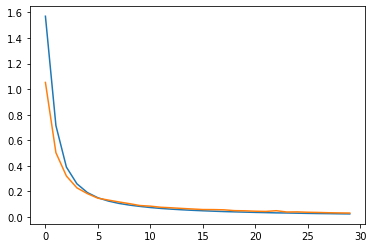

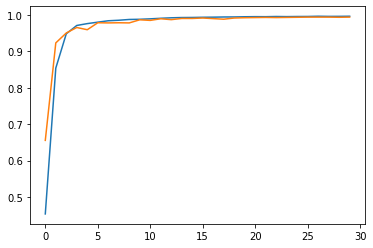

In [125]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [126]:
prediction = model.predict([x_val])
print(prediction.shape)

index = np.argmax(prediction, axis=1)
res = index + 1
result = pd.DataFrame({'id': np.arange(0, len(res)), 'target': res})

result = result.drop("id", axis=1)

from google.colab import files
result.to_csv('result.csv') 
files.download('result.csv')

120/120 [==============================] - 0s 2ms/step
(3840, 8)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>